# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [2]:
import pandas as pd 
df = pd.read_csv('/Users/madslangsorensen/Nextcloud/GitHub/sds_eml_2020/material/session_12/peer_effects_room.csv')
print(df.shape[0])
df.head()

2000


,person,room,high_school_GPA,college_GPA
0,0,351,-1.715472,-1.285307
1,1,738,-0.530190,-0.031833
2,2,247,-0.589543,-0.203230
3,3,751,-1.303115,0.982488
4,4,698,0.156678,-0.371632


In [3]:
#df.groupby('room').person.unique() 
df2 = df.groupby('room').person.agg(['min','max']).rename(columns={'min':'person','max':'person_other'})
df2.set_index('person')
df_a = df.merge(df2,on='person')
df3 = df2.rename(columns={'person':'person_other','person_other':'person'})
df3.set_index('person')
df_b = df.merge(df3,on='person')
df = pd.concat([df_a,df_b])
df

,person,room,high_school_GPA,college_GPA,person_other
0,0,351,-1.715472,-1.285307,1645
1,1,738,-0.530190,-0.031833,1039
2,2,247,-0.589543,-0.203230,944
3,3,751,-1.303115,0.982488,1099
4,4,698,0.156678,-0.371632,1708
...,...,...,...,...,...
995,1995,539,-1.258312,-1.622298,728
996,1996,39,-0.038745,0.694112,1497
997,1997,990,0.790980,0.257346,1589
998,1998,69,-1.556436,-1.371018,1475


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [4]:
df2 = df[['person_other','high_school_GPA','college_GPA']]
df2 = df2.rename(columns={'person_other':'person'})
df = df.merge(df2, on='person')
df

,person,room,high_school_GPA_x,college_GPA_x,person_other,high_school_GPA_y,college_GPA_y
0,0,351,-1.715472,-1.285307,1645,-0.818594,-0.434847
1,1,738,-0.530190,-0.031833,1039,-0.493444,0.299729
2,2,247,-0.589543,-0.203230,944,1.281112,-0.479543
3,3,751,-1.303115,0.982488,1099,-1.812137,-2.267394
4,4,698,0.156678,-0.371632,1708,-0.327219,0.670683
...,...,...,...,...,...,...,...
1995,1995,539,-1.258312,-1.622298,728,-0.463023,-0.393440
1996,1996,39,-0.038745,0.694112,1497,-0.042269,-0.139776
1997,1997,990,0.790980,0.257346,1589,-0.024570,0.415604
1998,1998,69,-1.556436,-1.371018,1475,-1.542693,-2.470238


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

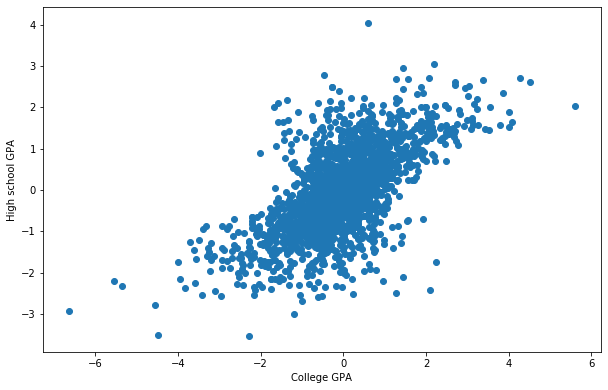

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=[10,10])
plt.scatter(df['college_GPA_x'],df['high_school_GPA_x'])
plt.ylabel('High school GPA')
plt.xlabel('College GPA')
ax.set_aspect('equal')

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

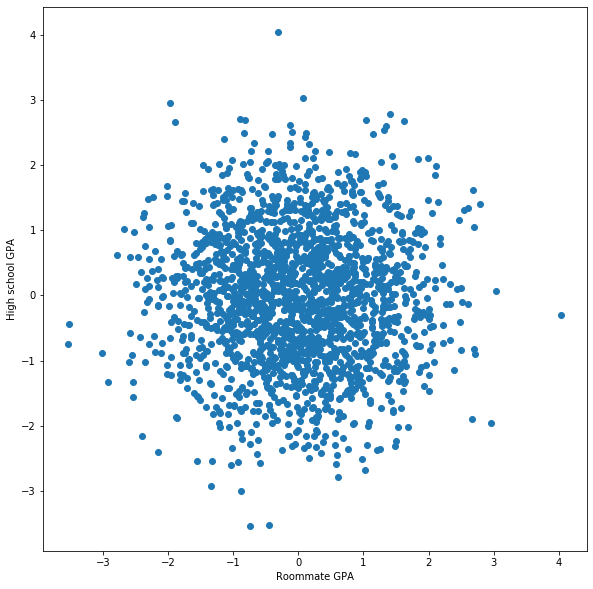

In [6]:
fig, ax = plt.subplots(figsize=[10,10])
plt.scatter(df['high_school_GPA_x'],df['high_school_GPA_y'])
plt.ylabel('High school GPA')
plt.xlabel('Roommate GPA')
ax.set_aspect('equal')

# Comment: It seems as if there is no correlation. 

In [7]:
import statsmodels.formula.api as smf

results = smf.ols('high_school_GPA_x ~ high_school_GPA_y', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      high_school_GPA_x   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Mon, 18 May 2020   Prob (F-statistic):              0.788
Time:                        10:38:30   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0284      0.023     -1.241      0.215      -0.073       0.016
high_school_GPA_y    -0.0060      0.022     -0.269      0.788      -0.050       0.038
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.288
Skew:                           0.015   Prob(JB):                        0.866
Kurtosis:                       2.949   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value is much larger than 0.05, and thus we reject the null hypothesis, and we can say that there is no relation between own GPA and roommate's. This is expected, because we think that the effect is between roommates - that we see a pattern in the assignment. 

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

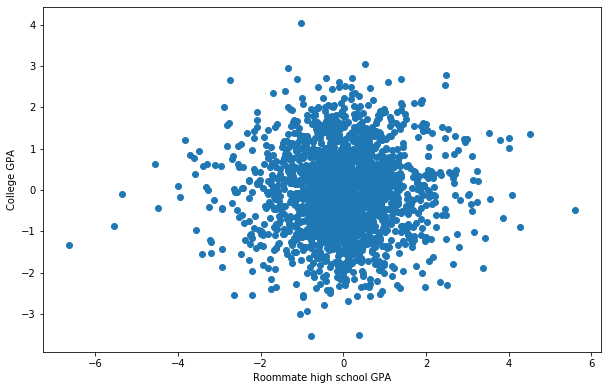

In [8]:
fig, ax = plt.subplots(figsize=[10,10])
plt.scatter(df['college_GPA_x'],df['high_school_GPA_y'])
plt.ylabel('College GPA')
plt.xlabel('Roommate high school GPA')
ax.set_aspect('equal')

# There seems to be no bias between own GPA in college and roommate high school GPA

In [9]:
results = smf.ols('college_GPA_x ~ high_school_GPA_x + high_school_GPA_y', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          college_GPA_x   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     671.3
Date:                Mon, 18 May 2020   Prob (F-statistic):          1.03e-223
Time:                        10:39:35   Log-Likelihood:                -2586.0
No. Observations:                2000   AIC:                             5178.
Df Residuals:                    1997   BIC:                             5195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0226      0.020     -1.147      0.252      -0.061       0.016
high_school_GPA_x     0.7059      0.019     36.606      0.000       0.668       0.744
high_school_GPA_y     0.0356      0.019      1.847      0.065      -0.002       0.073
==============================================================================
Omnibus:                       77.587   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.025
Skew:                          -0.117   Prob(JB):                     5.52e-47
Kurtosis:                       4.582   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [11]:
results = smf.ols('college_GPA_x ~ high_school_GPA_x + college_GPA_y', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          college_GPA_x   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     680.4
Date:                Mon, 18 May 2020   Prob (F-statistic):          4.46e-226
Time:                        10:55:44   Log-Likelihood:                -2580.6
No. Observations:                2000   AIC:                             5167.
Df Residuals:                    1997   BIC:                             5184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0209      0.020     -1.059      0.290      -0.059       0.018
high_school_GPA_x     0.7036      0.019     36.574      0.000       0.666       0.741
college_GPA_y         0.0654      0.017      3.788      0.000       0.032       0.099
==============================================================================
Omnibus:                       78.932   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.446
Skew:                          -0.117   Prob(JB):                     2.23e-48
Kurtosis:                       4.606   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Comments:***

I was a bit confused, since you wrote the same statement with both exogenous and endogenous effects (to do a "regresion of college school GPA on high school GPA for the person itself and its roommate"). 

What I have done now, is to see the exogenous effects as the peer's/roommate's previous GPA, and the endogenous effects as the peer's/roommate's current GPA, while controlling also for your own previous GPA. We see that the exogenous effect is not significant, while the endogenous is significant (with $\alpha$ = 0.05). 

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

***Answer:***

They estimate outcomes with e.g. the final primary school grade or later in life, income. The estimate endogenous effects with socio-economic characteristics for a student such a age, etnicity, parents' income, level of education or if they are together or not. They estimate the exogenous effect with the same characteristics for the rest of the student in the class (by a "leave-one-out"-method). 

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

***Answer:***

They try to avoid selection bias (homophily) by using the variation in schools from each year to year. Inspired by Hoxby (2000) they estimate on school and year instead of the exact classes. So they do a school-fixed-effects with year-dummies. They check and see that if the results are consistent with a class-fixed-effects. 

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.

***Answer:***

If we were not to think about ethics and privacy (and perhaps is only possible for Facebook). It could be interesting to estimate friendship peer effects. Usually, students are not always friend with everybody in their class. Some have a few friend, and some have many friend - which can also be from other classes or different years. With data from e.g. Facebook, we could know exactly who are friend with each other, and not just having a "official connection". Furthermore, it could be interesting to see if there is differences in peer effects if one has many friends or few friends. 